In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image_path = "512-512-grayscale-image-Cameraman.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Resim yüklenmedi.")

else:
    cv2.imshow("8-bitlik Resim", image)
    cv2.waitKey(0)

    min_deger = np.min(image)
    max_deger = np.max(image)
    
    mae_degeri = []
    psnr_degeri = []

7-bit Quantization -> MAE: 0.71, PSNR: 49.59 dB
6-bit Quantization -> MAE: 38.45, PSNR: 45.80 dB
5-bit Quantization -> MAE: 85.25, PSNR: 40.39 dB
4-bit Quantization -> MAE: 102.26, PSNR: 35.36 dB
3-bit Quantization -> MAE: 98.73, PSNR: 28.91 dB
2-bit Quantization -> MAE: 149.74, PSNR: 28.86 dB
1-bit Quantization -> MAE: 82.90, PSNR: 28.37 dB


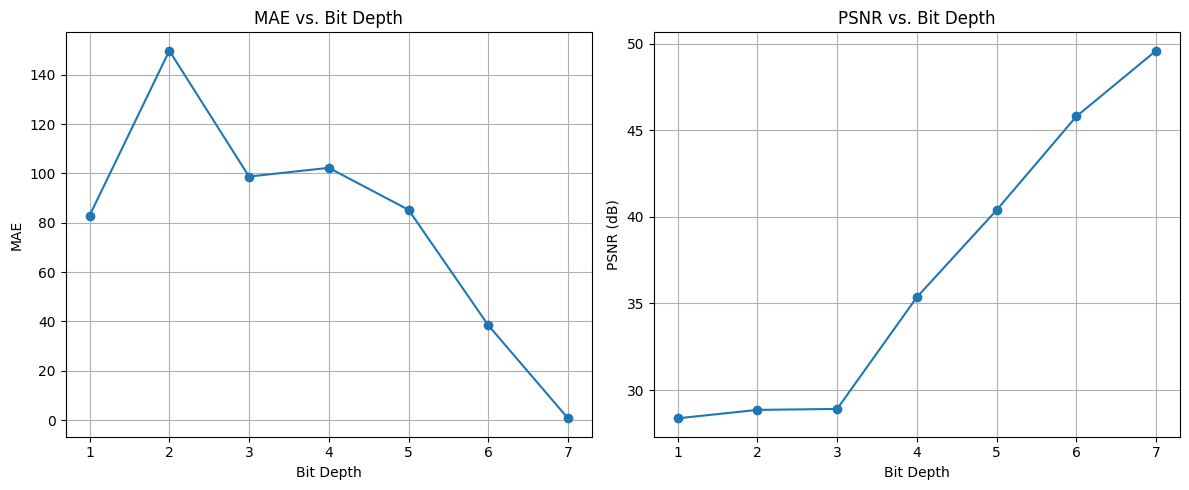

In [8]:
    for bits in range(7, 0, -1):
        seviye = 2 ** bits
        delta = (max_deger - min_deger) / seviye
        y = np.floor((image - min_deger) / delta)
        quantized_image = (y + 0.5) * delta + min_deger
        quantized_image = quantized_image.astype(np.uint8)

        rescaled_image = cv2.normalize(quantized_image, None, 0, 255, cv2.NORM_MINMAX)

        side_by_side = np.hstack((quantized_image, rescaled_image))

        cv2.imshow(f"{bits}-bit Quantized and Rescaled", side_by_side)
        cv2.waitKey(0)

        mae = np.mean(np.abs(image - quantized_image))
        mse = np.mean((image - quantized_image) ** 2)
        
        if mse == 0:
            psnr = float('inf')
        else:
            psnr = 20 * np.log10(255 / np.sqrt(mse))

        mae_degeri.append(mae)
        psnr_degeri.append(psnr)

        print(f"{bits}-bit Quantization -> MAE: {mae:.2f}, PSNR: {psnr:.2f} dB")
    
    cv2.destroyAllWindows()

    # Plot MAE and PSNR values
    bit_depths = list(range(7, 0, -1))
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(bit_depths, mae_degeri, marker='o')
    plt.title('MAE vs. Bit Depth')
    plt.xlabel('Bit Depth')
    plt.ylabel('MAE')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(bit_depths, psnr_degeri, marker='o')
    plt.title('PSNR vs. Bit Depth')
    plt.xlabel('Bit Depth')
    plt.ylabel('PSNR (dB)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    cv2.destroyAllWindows()